# Predicting Spam Mail using TfidfVectorizer (A Binary Classification Problem)

In this project I will be working with a dataset of emails - it contains the body of the email message and whether the email is a spam or ham (non spam).
The dataset is obtained from Kaggle https://www.kaggle.com/datasets/venky73/spam-mails-dataset/data

I will be applying a Logistic Regression Model to determine and predict whether a certain email message will be classified as a spam or ham (non spam). 

I will be using Python and some of its libraries to complete this project.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## The Dataset

In [4]:
mail = pd.read_csv('mail_data.csv')

In [5]:
mail.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
mail.shape

(5572, 2)

The Dataset is fairly simple containing only two columns and 5572 rows. Notice that in its raw form the dataset doesnt contain any numerical values. So as a first step, before doing  any kind of analysis these column values must be converted to numerical values.

#### Checking missing values

In [8]:
mail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


There are no missing values

## Feature Engineering

#### Converting Values in Category column to Numerical Values

In [9]:
mail.replace({'Category':{'ham':1,'spam':0}}, inplace=True)

In [10]:
mail.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


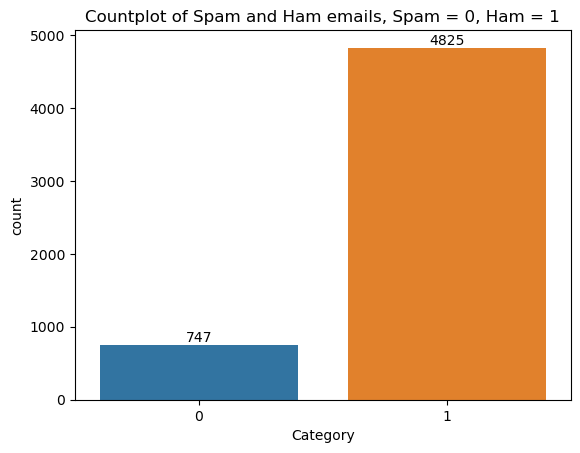

In [16]:
plt.title('Countplot of Spam and Ham emails, Spam = 0, Ham = 1')
ax = sns.countplot(mail, x ='Category')
for container in ax.containers:
    ax.bar_label(container)

#### Seperating the data into target and feature

In this case the Category is Target variable while the Message column is the feature

In [11]:
X = mail['Message']
y = mail['Category']

In [12]:
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [13]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Category, dtype: int64

## Building the Machine Learning Model 

#### Splitting Data into Training and Test Data

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=3)
#random state ensures that data is split in the same way each time we run this model

In [19]:
print(X.shape, X_train.shape,X_test.shape)

(5572,) (4457,) (1115,)


#### Feature Extraction

we will transform the text values in Message column into feature  vectors so that we can seamlessly run our logistic regression model.

In [24]:
# For converting Text Data into numerical values
from sklearn.feature_extraction.text import TfidfVectorizer

The TFidfVectorizer (Term Frequency Inverse Document Frequency) will go through all the words in the Message column and note the frequency of occurence of each word. Then based on the occurence it will assign a score to each word. The words occuring more frequently get higher score and so on. It will then associate such words with the Category values of spam or ham. For example; if the word 'free' occurs 1000 times and mostly in spam rows, the model will associate 'free' with spam and will label the entire message with spam.

min_df = if the score of a word is <=1 then we ignore that word, it is classified as word not very significant.

stop_words = these are insignificant words which are filtered out during analysis, like - is, the, a. By setting it to english the model will ignore all stop words in English language

lowercase = all letters would be changed to lowercase.

In [26]:
feature_extraction = TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

In [27]:
#All the converted values of X_train will be stored here:
X_train_features = feature_extraction.fit_transform(X_train)

In [28]:
#All the converted values of X_test will be stored here:
X_test_features = feature_extraction.transform(X_test)
#But this time we dont fit the model with X_test data, we just transform it

In [31]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

#### Training the Machine Learning Model

We shall be using X_train_features and X_test_features going forward

In [32]:
from sklearn.linear_model import LogisticRegression

In [34]:
model = LogisticRegression()

model.fit(X_train_features,y_train)

LogisticRegression()

#### Model Evaluation

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
# Prediction on Training data

X_train_pred = model.predict(X_train_features)

In [41]:
accuracy_train_data = accuracy_score(X_train_pred,y_train)
print(f"Accuracy Score on Train Data: {accuracy_train_data}")

Accuracy Score on Train Data: 0.9670181736594121


In [42]:
# Prediction on Test data

X_test_pred = model.predict(X_test_features)

In [43]:
accuracy_test_data = accuracy_score(X_test_pred,y_test)
print(f"Accuracy Score on Test Data: {accuracy_test_data}")

Accuracy Score on Test Data: 0.9659192825112107


The two scores are very close to each other, so we can conclude our model is pretty accurate.